               Close  Volume (BTC)
Date                              
2018-03-03  11445.00   7786.267540
2018-03-02  11029.99   8329.097901
2018-03-01  10903.13   9481.665146
Correlation =  -0.876326984886548


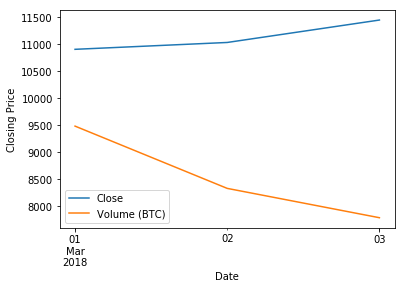

In [154]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt 
import csv
quandl.ApiConfig.api_key = api_key



def get_btc_info():

    try:
        t = quandl.get("BCHARTS/BITSTAMPUSD",start_date="2018-03-01",end_date="2018-03-03",order="desc")
     
        return t

    except:
        return None

    
def plot_btc_price():
    

        
                plots = pd.read_csv("BTC_PRICE.CSV")
                plots['Date'] = pd.to_datetime(plots['Date'], format = '%Y-%m-%d')
                plots.index = plots['Date']
                del plots['Date']
                del plots['Open']
                del plots['High']
                del plots['Low']
                del plots['Volume (Currency)']
                del plots['Weighted Price']
                print (plots.head())
                price=plots.plot()
                price.set_xlabel("Date")
                price.set_ylabel("Closing Price")
                
                mm = plots['Close'].corr(plots['Volume (BTC)'])
                print("Correlation = ", mm)
                
                  
    
def write_price_to_file(price):
        try:
            price.to_csv("BTC_PRICE.CSV") 
        except IOError:
            print('An error occured trying to read the file.')
        except ValueError:
            print('Non-numeric data found in the file.')
        except ImportError:
            print('NO module found')
        except EOFError:
            print('Why did you do an EOF on me?')
        except KeyboardInterrupt:
            print('You cancelled the operation.')
    
    
if __name__ == "__main__":          
    
    t = get_btc_info()

    write_price_to_file(t)
    
    plot_btc_price()
    
    